In [63]:
#Erez Sarousi
#Professor Werner
#DSC550 Data Mining
#Bellevue University
#5/3/2021

In [64]:
import matplotlib.pyplot as plt
import pandas as pd
from pandas.core.common import SettingWithCopyWarning
from nltk.stem import PorterStemmer 
from nltk.corpus import stopwords
from nltk import word_tokenize
import re
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import Lasso
from textblob import TextBlob
import warnings

In [65]:
#Bringing the dataframe from Milestone 1.
pd.set_option('display.max_colwidth', None)
items = pd.read_csv('20191226-items.csv')
reviews = pd.read_csv('20191226-reviews.csv')
AP = items['title'].str.lower().str.find('iphone')!=-1
items_df = items.loc[AP]
apple = pd.merge(items_df,reviews, on='asin')
apple = apple.dropna()
del apple['image']
del apple['url']
del apple['reviewUrl']
del apple['price']
del apple['name']
del apple['rating_x']
apple.columns = ['Item #', 'Brand', 'Model', 'Reviews', 'Price', 'Rating', 'Date', 'Verified', 'Review Title', 'Review',
                 'Helpful']
apple['Date'] = pd.to_datetime(apple['Date'])
del apple['Brand']
del apple['Review Title']
del apple['Reviews']
del apple['Helpful']
del apple['Verified']
### Sentiment Analysis:
#Lowering the casing.
apple['Review'] = apple['Review'].apply(lambda x: " ".join(x.lower() for x in x.split()))
#Removing punctuation.
apple['Review'] = apple['Review'].map(lambda x: re.sub(r'\W+', ' ', x))
#Removing stop words.
stop = stopwords.words('english') #stop words = English.
apple['Review'] = apple['Review'].apply(lambda x: " ".join(x for x in x.split() if x not in stop)) 
#Word tokenizing
apple['Review'] = apple['Review'].apply(word_tokenize) 
#word stemming
stemmer = PorterStemmer()
apple['Review'] = apple['Review'].apply(lambda x: ' '.join([stemmer.stem(y) for y in x]))
#List of terms people would use to review.
Battery = ["battery", 'charge', 'juice', 'charging', 'talk time', 'hours', 'minutes', 'life', 'lasts']
Camera = ["camera", 'pixels', 'megapixels', 'pictures', 'video', 'facial', 'recognition', 'animoji', 'zoom', 'dual',
          'optical', 'front', 'rear', 'back', 'lens']
Speed = ['speed', 'fast', 'slow', 'quick', 'lag', 'ram']
Storage = ["storage", 'space', 'room', 'memory', 'gb', 'capacity', 'expandable']
Software = ["software", 'itunes', 'app store', 'app', 'ios', 'animoji', 'game', 'siri', 'touch screen']
Music = ["music", 'audio', 'song', 'sound', 'speaker']
Screen = ["screen", 'oled', 'led', 'lcd', 'scratch', 'widescreen', 'backlit', 'display', 'retina', 'glass', 'inch',
          'resolution', 'break', 'unbreakable', 'shatter', 'chip']
#Searching all rows for items in the lists.
batt = apple[apple['Review'].str.lower().str.contains('|'.join(Battery))]
came = apple[apple['Review'].str.lower().str.contains('|'.join(Camera))]
spee = apple[apple['Review'].str.lower().str.contains('|'.join(Speed))]
stor = apple[apple['Review'].str.lower().str.contains('|'.join(Storage))]
soft = apple[apple['Review'].str.lower().str.contains('|'.join(Software))]
musi = apple[apple['Review'].str.lower().str.contains('|'.join(Music))]
scre = apple[apple['Review'].str.lower().str.contains('|'.join(Screen))]
#Defining the sentiment analysis function
def ss(x):
    return TextBlob(x).sentiment 
#Adding sentiment analysis and slicing the positivity/negativity scores columns.
batt['Score'] = batt['Review'].apply(ss)
batt['Positivity'] = batt['Score'].apply(lambda x:x[0])
batt['Topic'] = 'Battery'
batt.head()
#Adding sentiment analysis and slicing the positivity/negativity scores columns.
came['Score'] = came['Review'].apply(ss)
came['Positivity'] = came['Score'].apply(lambda x:x[0])
came['Topic'] = 'Camera'
#Adding sentiment analysis and slicing the positivity/negativity scores columns.
spee['Score'] = spee['Review'].apply(ss)
spee['Positivity'] = spee['Score'].apply(lambda x:x[0])
spee['Topic'] = 'Speed'
#Adding sentiment analysis and slicing the positivity/negativity scores columns.
stor['Score'] = stor['Review'].apply(ss)
stor['Positivity'] = stor['Score'].apply(lambda x:x[0])
stor['Topic'] = 'Storage'
#Adding sentiment analysis and slicing the positivity/negativity scores columns.
soft['Score'] = soft['Review'].apply(ss)
soft['Positivity'] = soft['Score'].apply(lambda x:x[0])
soft['Topic'] = 'Software'
#Adding sentiment analysis and slicing the positivity/negativity scores columns.
musi['Score'] = musi['Review'].apply(ss)
musi['Positivity'] = musi['Score'].apply(lambda x:x[0])
musi['Topic'] = 'Music'
#Adding sentiment analysis and slicing the positivity/negativity scores columns.
scre['Score'] = scre['Review'].apply(ss)
scre['Positivity'] = scre['Score'].apply(lambda x:x[0])
scre['Topic'] = 'Screen'
#Merging the dataframes in one..
a_df = [batt, came, spee, stor, soft, musi, scre]
a_df = pd.concat(a_df, axis=0, join='inner').reset_index()
#Get dummies categorical values binary
categorical = ['Topic','Item #']
a_df_cat = pd.get_dummies(a_df[categorical],drop_first=True)
#Getting the list from columns
a_df[list(a_df_cat.columns)] = a_df_cat[list(a_df_cat.columns)]
#Cleaning the new datasets of columns we no longer need.
del a_df['Item #']
del a_df['Model']
del a_df['Review']
del a_df['Topic']
del a_df['index']
del a_df['Date']
del a_df['Score']

C:\Users\Erez\anaconda3\lib\site-packages\ipykernel_launcher.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Erez\anaconda3\lib\site-packages\ipykernel_launcher.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Erez\anaconda3\lib\site-packages\ipykernel_launcher.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-

In [66]:
#Starting to normalize the price and rating columns.
a_df['Price'] = a_df['Price']/a_df['Price'].max()
a_df['Rating'] = a_df['Rating']/a_df['Rating'].max()
a_df.head()

,Price,Rating,Positivity,Topic_Camera,Topic_Music,Topic_Screen,Topic_Software,Topic_Speed,Topic_Storage,Item #_B01CR1FQMG,...,Item #_B07HKQ61NV,Item #_B07KFNRQ5S,Item #_B07KKL5KGG,Item #_B07P6Y8L3F,Item #_B07Q6VQ147,Item #_B07RDMLR4V,Item #_B07RKYQSRB,Item #_B07RT1X4FJ,Item #_B07SVPKTYK,Item #_B07ZPKZSSC
0,0.879998,0.2,0.069697,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0.879998,1.0,0.457236,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0.879998,0.2,-0.010000,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0.000000,1.0,0.129176,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.000000,1.0,0.256876,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [67]:
#Creating a list and looping through to format.
a_df_list = list(a_df_cat.columns)+['Price',"Rating"]

for x in a_df_list:
    x = 'a_df["'+x+'"]'

In [68]:
#Creating a linear regression and conerting the coefficients to a list.
regr = linear_model.LinearRegression()
regr.fit(a_df[a_df_list], a_df["Positivity"])
coef = regr.coef_.tolist()

In [69]:
#Displaying the results and formatting it to display next to the name of each categorical value.
for x,y in zip(a_df_list,coef):
    y=str(y)
    print(x+": "+y)

Topic_Camera: -0.03892859331117482
Topic_Music: 0.006796877604935313
Topic_Screen: -0.012566999826728159
Topic_Software: -0.02113548215363195
Topic_Speed: -0.009037092692181031
Topic_Storage: -0.02519573986218357
Item #_B01CR1FQMG: -410413542592.9012
Item #_B01GXAT0CE: 0.04286894159856297
Item #_B01JAWWVXW: -211422143284.19867
Item #_B01LYHIUQ7: -0.02130126953125
Item #_B01N4IHGHI: 0.06732940673828125
Item #_B01N4R20RS: -0.1094512939453125
Item #_B01N9I0RWL: -0.1283721923828125
Item #_B01N9YO1DS: -248733030654.61667
Item #_B06X9X15Y8: 0.03185272216796875
Item #_B06XGLHP8V: 0.119354248046875
Item #_B06XR1K6HR: 0.14187860488891602
Item #_B06XR8G1TX: -102604940268.48807
Item #_B06XRG6S73: 0.12811279296875
Item #_B06XRJQX91: -169043193712.679
Item #_B06XRJXL3R: -342010249080.43835
Item #_B06XRN4RWL: 0.187469482421875
Item #_B06XS3CTJM: 0.05970001220703125
Item #_B06XS4978K: 0.03485870361328125
Item #_B071JPQYGK: -342010249080.2164
Item #_B071W9WQ8M: -0.02715015411376953
Item #_B0731HBTZ7: 

In [70]:
#Feature reduction
max_val=max(coef)
important_features = []

for coe,f_name in zip(coef,a_df_list):
    if abs(coe) > max_val/1000:
        important_features.append(f_name)
        
print(important_features)

['Item #_B01CR1FQMG', 'Item #_B01JAWWVXW', 'Item #_B01N9YO1DS', 'Item #_B06XR8G1TX', 'Item #_B06XRJQX91', 'Item #_B06XRJXL3R', 'Item #_B071JPQYGK', 'Item #_B0731HBTZ7', 'Item #_B0743HD6MS', 'Item #_B07643YNY8', 'Item #_B076KC34PM', 'Item #_B07753NSQZ', 'Item #_B0775451TT', 'Item #_B077578VXH', 'Item #_B0775H5HJW', 'Item #_B079HB518K', 'Item #_B07G7FG26S', 'Item #_B07HKQ61NV', 'Item #_B07SVPKTYK', 'Price']


In [71]:
#Creating a linear regression and conerting the coefficients to a list.
regr = linear_model.LinearRegression()
regr.fit(a_df[important_features], a_df["Positivity"])
coef = regr.coef_.tolist()

In [72]:
#Displaying the results and formatting it to display next to the name of each categorical value.
for x,y in zip(important_features,coef):
    y=str(y)
    print(x+": "+y)

Item #_B01CR1FQMG: -4853196828272.776
Item #_B01JAWWVXW: -2500096046371.089
Item #_B01N9YO1DS: -2941302442977.709
Item #_B06XR8G1TX: -1213317590668.072
Item #_B06XRJQX91: -1998959114225.4727
Item #_B06XRJXL3R: -4044318434493.984
Item #_B071JPQYGK: -4044318434493.7188
Item #_B0731HBTZ7: -1544222388122.9146
Item #_B0743HD6MS: -1536795413779.7788
Item #_B07643YNY8: -1838286451461.0527
Item #_B076KC34PM: -3676646437321.863
Item #_B07753NSQZ: -2794233644108.7383
Item #_B0775451TT: -5515006423182.574
Item #_B077578VXH: -2353027247502.167
Item #_B0775H5HJW: -5404778358430.372
Item #_B079HB518K: -1521426724298.2124
Item #_B07G7FG26S: -3676646437321.9023
Item #_B07HKQ61NV: -2419061138194.4
Item #_B07SVPKTYK: -1838286451461.4111
Price: 5515006423182.597


In [73]:
#Hyperparametic tuning with lasso regression
lasso_model = Lasso(alpha=.001)
lasso_model.fit(a_df[a_df_list],a_df['Positivity'])

coef = lasso_model.coef_.tolist()
for x,y in zip(a_df_list,coef):
    y=str(y)
    print(x+": "+y)

Topic_Camera: -0.017875481180213548
Topic_Music: 0.005888487048232127
Topic_Screen: -0.0
Topic_Software: -0.0021404519031579645
Topic_Speed: 0.0
Topic_Storage: -0.0
Item #_B01CR1FQMG: -0.0
Item #_B01GXAT0CE: 0.0
Item #_B01JAWWVXW: -0.0
Item #_B01LYHIUQ7: -0.0
Item #_B01N4IHGHI: 0.0
Item #_B01N4R20RS: -0.0
Item #_B01N9I0RWL: -0.0
Item #_B01N9YO1DS: -0.01616669195663022
Item #_B06X9X15Y8: -0.0
Item #_B06XGLHP8V: 0.009835019350086968
Item #_B06XR1K6HR: 0.002441463207618178
Item #_B06XR8G1TX: -0.0
Item #_B06XRG6S73: 0.06972374160802193
Item #_B06XRJQX91: -0.0
Item #_B06XRJXL3R: 0.01989335361098959
Item #_B06XRN4RWL: 0.0
Item #_B06XS3CTJM: 0.0
Item #_B06XS4978K: -0.0
Item #_B071JPQYGK: 0.0
Item #_B071W9WQ8M: -0.0
Item #_B0731HBTZ7: 0.03145964723596136
Item #_B0732NTJ2M: 0.0
Item #_B0743HD6MS: 0.0
Item #_B07643YNY8: 0.009139050633244165
Item #_B076KC34PM: 0.0
Item #_B07753NSQZ: 0.0
Item #_B0775451TT: 0.0
Item #_B07755LZ67: -0.0
Item #_B07756QYST: -0.0
Item #_B0775717ZP: -0.0
Item #_B077578VX

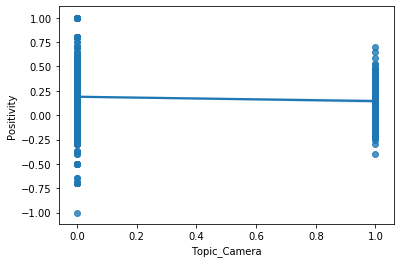

In [74]:
#Linear regression
sns.regplot(x="Topic_Camera",y="Positivity",data=a_df)

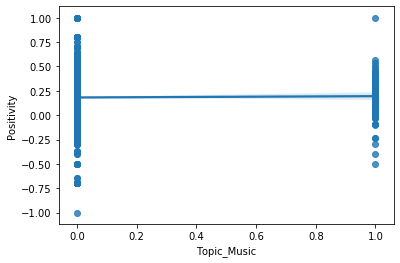

In [75]:
#Linear regression
sns.regplot(x="Topic_Music",y="Positivity",data=a_df)

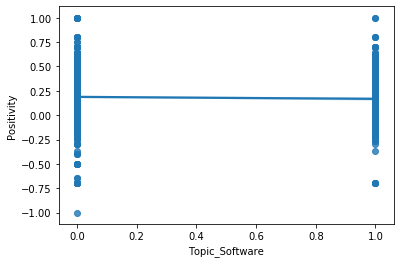

In [76]:
#Linear regression
sns.regplot(x="Topic_Software",y="Positivity",data=a_df)

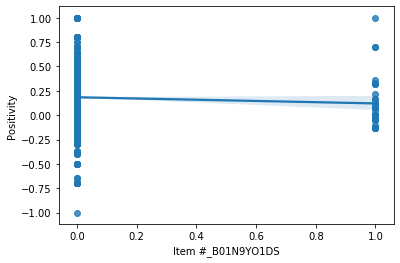

In [77]:
#Linear regression
sns.regplot(x="Item #_B01N9YO1DS",y="Positivity",data=a_df)

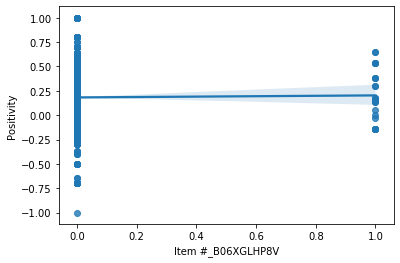

In [78]:
#Linear regression
sns.regplot(x="Item #_B06XGLHP8V",y="Positivity",data=a_df)

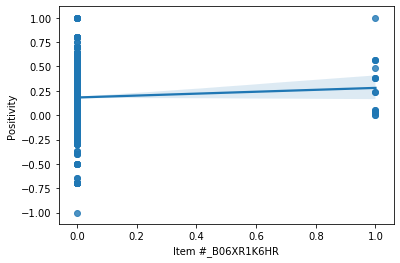

In [79]:
#Linear regression
sns.regplot(x="Item #_B06XR1K6HR",y="Positivity",data=a_df)

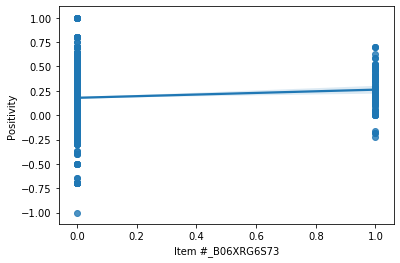

In [80]:
#Linear regression
sns.regplot(x="Item #_B06XRG6S73",y="Positivity",data=a_df)

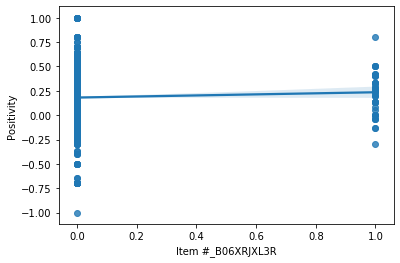

In [81]:
#Linear regression
sns.regplot(x="Item #_B06XRJXL3R",y="Positivity",data=a_df)

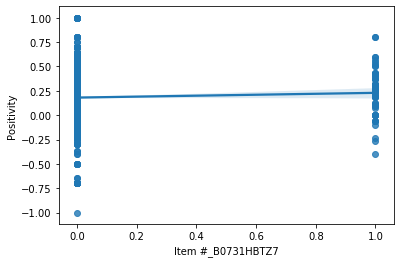

In [82]:
#Linear regression
sns.regplot(x="Item #_B0731HBTZ7",y="Positivity",data=a_df)

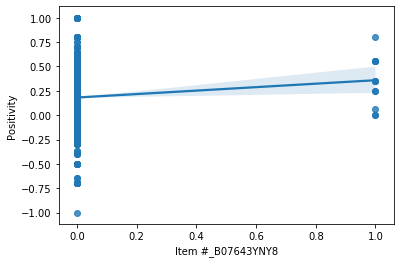

In [83]:
#Linear regression
sns.regplot(x="Item #_B07643YNY8",y="Positivity",data=a_df)

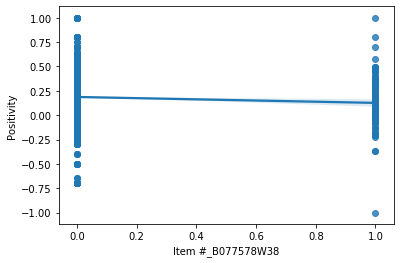

In [84]:
#Linear regression
sns.regplot(x="Item #_B077578W38",y="Positivity",data=a_df)

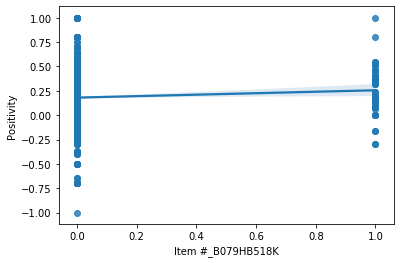

In [85]:
#Linear regression
sns.regplot(x="Item #_B079HB518K",y="Positivity",data=a_df)

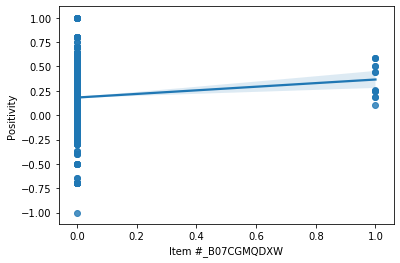

In [86]:
#Linear regression
sns.regplot(x="Item #_B07CGMQDXW",y="Positivity",data=a_df)

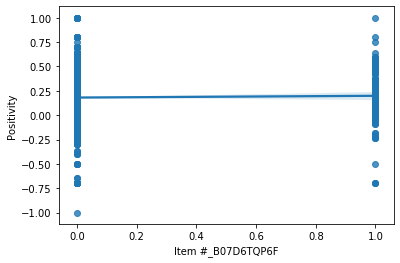

In [87]:
#Linear regression
sns.regplot(x="Item #_B07D6TQP6F",y="Positivity",data=a_df)

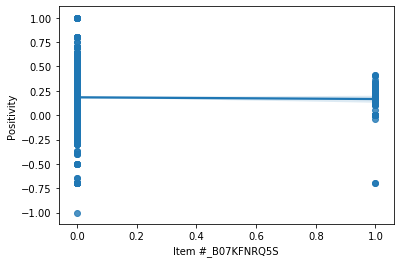

In [88]:
#Linear regression
sns.regplot(x="Item #_B07KFNRQ5S",y="Positivity",data=a_df)

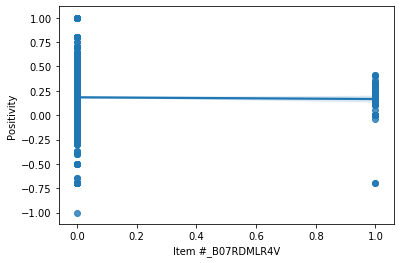

In [89]:
#Linear regression
sns.regplot(x="Item #_B07RDMLR4V",y="Positivity",data=a_df)

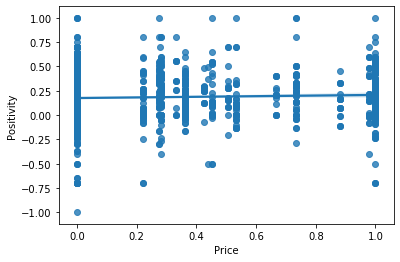

In [90]:
#Linear regression
sns.regplot(x="Price",y="Positivity",data=a_df)

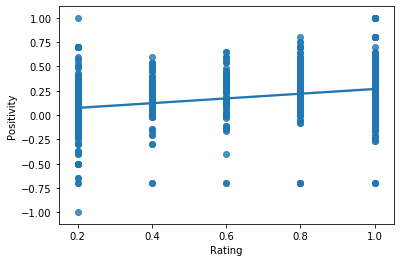

In [91]:
#Linear regression
sns.regplot(x="Rating",y="Positivity",data=a_df)